In [58]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

# Suppressing annoying harmless error
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)
warnings.simplefilter('ignore')

In [59]:
# We read the consumer price index (CPI) data from this website: https://fred.stlouisfed.org/series/CPIAUCSL
cpi_data = pd.read_excel('CPIAUCSL.xls', skiprows=10)

# Remove NA's
cpi_data.dropna(inplace=True)

In [60]:
cpi_data.head()

,observation_date,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [61]:
cpi_data.index = pd.to_datetime(cpi_data.observation_date)
cpi_data.drop(['observation_date'], axis=1, inplace=True)
cpi_data.rename(columns={'CPIAUCSL': 'cpi'}, inplace=True)
cpi_data.head()

,cpi
observation_date,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


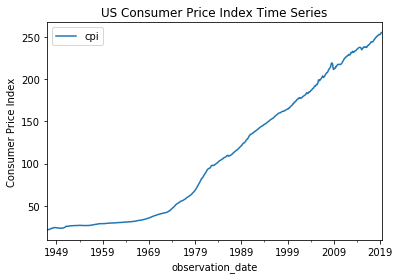

In [62]:
cpi_data.plot()
plt.title('US Consumer Price Index Time Series')
plt.ylabel('Consumer Price Index')
plt.show()

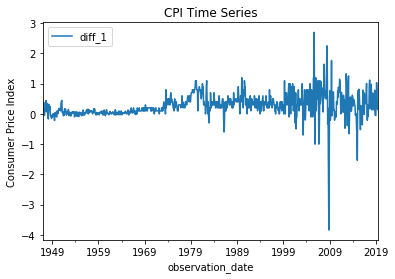

In [63]:
cpi_data['diff_1'] = cpi_data.cpi - cpi_data.cpi.shift()
cpi_data.plot(y='diff_1')
plt.title('CPI Time Series')
plt.ylabel("Consumer Price Index")
plt.show()

Text(0.5, 1.0, 'US CPI PACF')

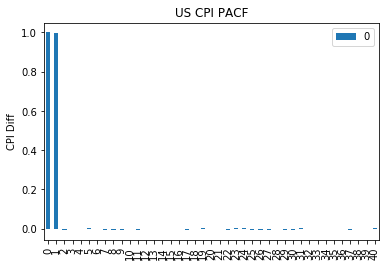

In [64]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(cpi_data.cpi))
x_acf.plot(kind='bar')
plt.ylabel('CPI Diff')
plt.title("US CPI PACF")

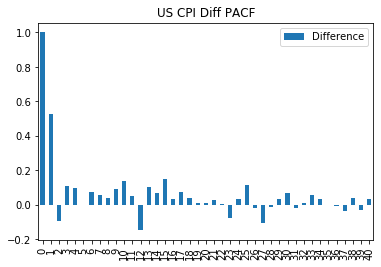

In [65]:
x_acf = pd.DataFrame(pacf(cpi_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("US CPI Diff PACF")
plt.legend(['Difference'])

In [66]:
cpi_data.head()

,cpi,diff_1
observation_date,,
1947-01-01,21.48,NaN
1947-02-01,21.62,0.14
1947-03-01,22.00,0.38
1947-04-01,22.00,0.00
1947-05-01,21.95,-0.05


In [67]:
# Run various ARIMA models to see which p, d and q values fit the best
# Pick the one with lowest AIC

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(cpi_data.cpi, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                  D.cpi   No. Observations:                  869
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -407.297
Method:                           css   S.D. of innovations              0.387
Date:                Tue, 13 Aug 2019   AIC                            818.593
Time:                        17:03:51   BIC                            828.128
Sample:                    02-01-1947   HQIC                           822.242
                         - 06-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2691      0.013     20.515      0.000       0.243       0.295
Residuals Description
count    8.690000e+02
mean     1.884092e-09
std      3.868698e-01
min     -4.111074e+00
25%     -2.090736e-01

In [68]:

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(cpi_data.cpi, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                    cpi   No. Observations:                  870
Model:                     ARMA(1, 0)   Log Likelihood                -588.363
Method:                       css-mle   S.D. of innovations              0.471
Date:                Tue, 13 Aug 2019   AIC                           1182.727
Time:                        17:03:52   BIC                           1197.032
Sample:                    01-01-1947   HQIC                          1188.200
                         - 06-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.9381        nan        nan        nan         nan         nan
ar.L1.cpi      1.0000        nan        nan        nan         nan         nan
                                    Roots           

In [69]:

from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(cpi_data.cpi, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                  D.cpi   No. Observations:                  869
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -259.485
Method:                       css-mle   S.D. of innovations              0.326
Date:                Tue, 13 Aug 2019   AIC                            526.969
Time:                        17:03:53   BIC                            546.039
Sample:                    02-01-1947   HQIC                           534.266
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2688      0.021     12.547      0.000       0.227       0.311
ar.L1.D.cpi     0.3700      0.058      6.385      0.000       0.256       0.484
ma.L1.D.cpi     0.2211      0.061      3.624    

In [70]:

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(cpi_data.cpi, order=(5,1,5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                  D.cpi   No. Observations:                  869
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -227.424
Method:                       css-mle   S.D. of innovations              0.314
Date:                Tue, 13 Aug 2019   AIC                            478.849
Time:                        17:04:05   BIC                            536.057
Sample:                    02-01-1947   HQIC                           500.739
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2608      0.085      3.050      0.002       0.093       0.428
ar.L1.D.cpi     1.0251      0.227      4.526      0.000       0.581       1.469
ar.L2.D.cpi    -0.7556      0.390     -1.938    

Text(0.5, 1.0, 'Histogram of CPI Residuals')

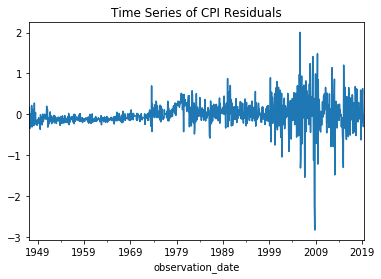

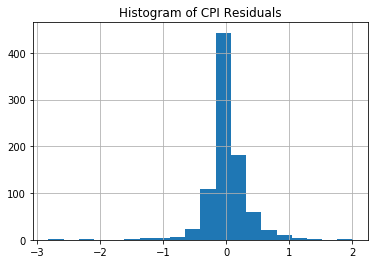

In [71]:
# Plot the residuals i.e the actual - predicted

residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of CPI Residuals')

residuals.hist(bins=20)
plt.title('Histogram of CPI Residuals')

In [72]:
cpi_data[cpi_data.isnull().any(axis=1)]

,cpi,diff_1
observation_date,,
1947-01-01,21.48,NaN


In [73]:
train_cpi = cpi_data.cpi[:650]
test_cpi = cpi_data.cpi[650:]

In [74]:
cpi_data.cpi

observation_date
1947-01-01     21.480
1947-02-01     21.620
1947-03-01     22.000
1947-04-01     22.000
1947-05-01     21.950
1947-06-01     22.080
1947-07-01     22.230
1947-08-01     22.400
1947-09-01     22.840
1947-10-01     22.910
1947-11-01     23.060
1947-12-01     23.410
1948-01-01     23.680
1948-02-01     23.670
1948-03-01     23.500
1948-04-01     23.820
1948-05-01     24.010
1948-06-01     24.150
1948-07-01     24.400
1948-08-01     24.430
1948-09-01     24.360
1948-10-01     24.310
1948-11-01     24.160
1948-12-01     24.050
1949-01-01     24.010
1949-02-01     23.910
1949-03-01     23.910
1949-04-01     23.920
1949-05-01     23.910
1949-06-01     23.920
               ...   
2017-01-01    243.780
2017-02-01    243.961
2017-03-01    243.749
2017-04-01    244.051
2017-05-01    243.962
2017-06-01    244.182
2017-07-01    244.390
2017-08-01    245.297
2017-09-01    246.418
2017-10-01    246.587
2017-11-01    247.332
2017-12-01    247.901
2018-01-01    248.884
2018-02-01    2

In [75]:
model = ARIMA(train_cpi, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

pred = model_fit.predict(start=len(train_cpi), end=len(train_cpi) + 220)

In [76]:
pred

2001-03-01    0.264794
2001-04-01    0.212954
2001-05-01    0.452012
2001-06-01    0.660040
2001-07-01    0.284643
2001-08-01   -0.034637
2001-09-01    0.295863
2001-10-01    0.629275
2001-11-01   -0.132255
2001-12-01    0.216978
2002-01-01    0.126652
2002-02-01    0.320018
2002-03-01    0.413113
2002-04-01    0.384902
2002-05-01    0.500102
2002-06-01    0.105547
2002-07-01    0.255098
2002-08-01    0.478258
2002-09-01    0.388518
2002-10-01    0.234886
2002-11-01    0.313734
2002-12-01    0.319541
2003-01-01    0.370724
2003-02-01    0.599874
2003-03-01    0.544005
2003-04-01    0.163827
2003-05-01   -0.165842
2003-06-01    0.231330
2003-07-01    0.370862
2003-08-01    0.417654
                ...   
2017-02-01    0.674115
2017-03-01    0.223308
2017-04-01    0.076068
2017-05-01    0.275542
2017-06-01    0.005791
2017-07-01    0.402041
2017-08-01    0.360447
2017-09-01    0.550788
2017-10-01    0.539983
2017-11-01    0.037741
2017-12-01    0.686197
2018-01-01    0.469093
2018-02-01 

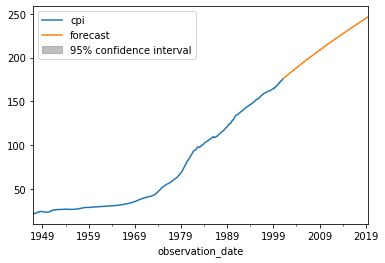

In [77]:
fig, ax = plt.subplots()
ax = train_cpi.plot()
fig = model_fit.plot_predict(start = '2001-03-01', end= '2019-07-01', dynamic=True, ax=ax,plot_insample=False)
plt.show()

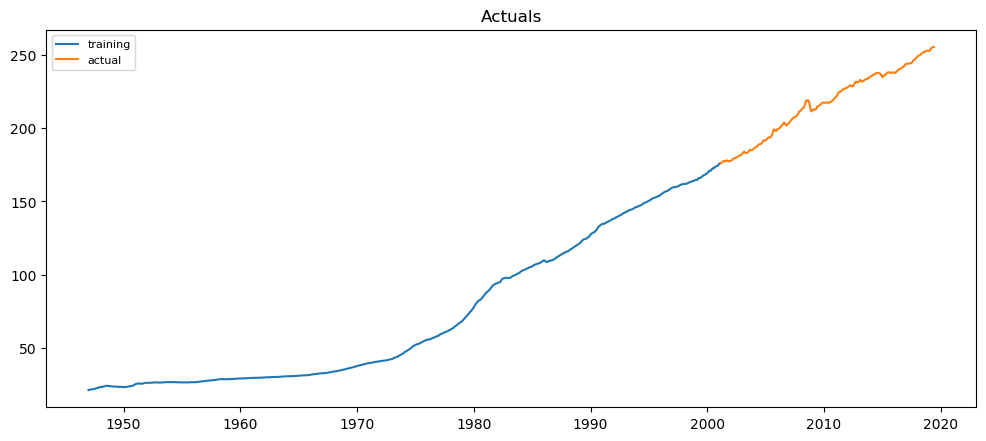

In [78]:

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_cpi, label='training')
plt.plot(test_cpi, label='actual')
plt.title('Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()